<H1>PUNTO 2 </H1> 

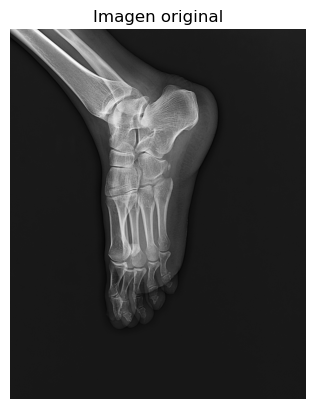

Forma original de la imagen: (2880, 2304)


In [2]:
from matplotlib import pyplot as plt
from skimage.io import imread
import numpy as np

# Cargar imagen 
img = imread('Radiografias/IMG0000185.jpg', as_gray=True)  # Escala de grises
plt.imshow(img, cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.show()

# Convertir en arreglo numpy
img_array = np.array(img)
print(f"Forma original de la imagen: {img_array.shape}")

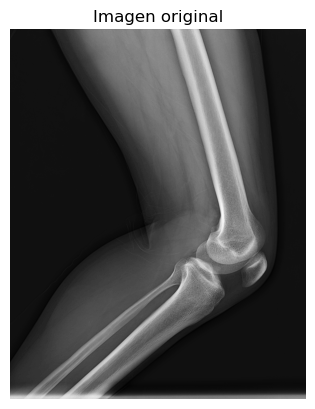

Forma original de la imagen: (2880, 2304)


In [3]:
# Cargar imagen
img2 = imread('Radiografias/IMG0000245.jpg', as_gray=True)  # Escala de grises
plt.imshow(img2, cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.show()

# Convertir en arreglo numpy
img2_array = np.array(img2)
print(f"Forma original de la imagen: {img2_array.shape}")

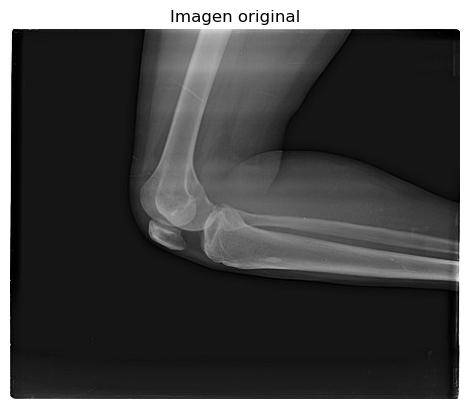

Forma original de la imagen: (373, 454)


In [4]:
# Cargar imagen
img3 = imread('Radiografias/IMG0003784.jpg', as_gray=True)  # Escala de grises
plt.imshow(img3, cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.show()

# Convertir en arreglo numpy
img3_array = np.array(img3)
print(f"Forma original de la imagen: {img3_array.shape}")

<h2>Carga y visualización de imágenes</h2>

Se cargaron tres imágenes radiográficas diferentes y se convirtieron a arreglos numpy en escala de grises. Este paso es fundamental para poder manipular numéricamente las intensidades de los píxeles.

<h2>IMAGEN 1</H2>

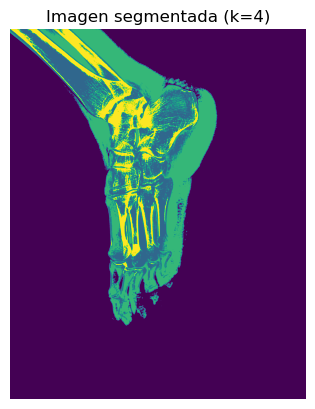

In [5]:
from sklearn.cluster import KMeans

# Reshape: de (alto, ancho) a (pixeles, 1)
X = img_array.reshape(-1, 1)

# Probar con K clusters (prueba inicial con K=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img = labels.reshape(img_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img, cmap='viridis')  # cmap puede cambiarse para visualización
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

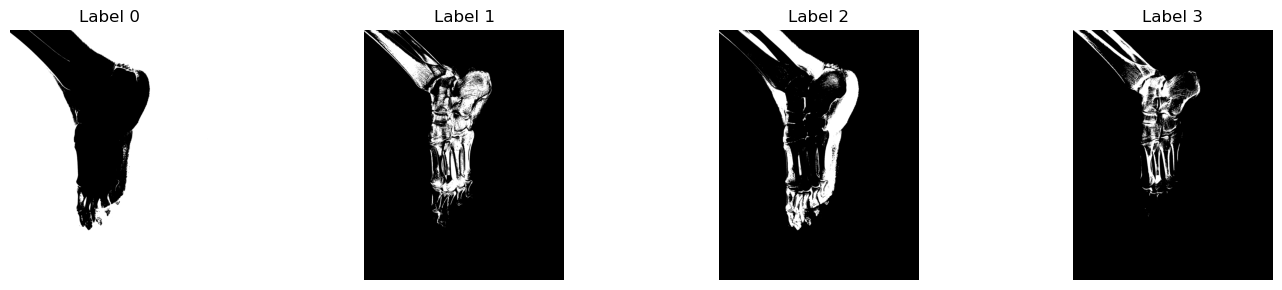

In [6]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

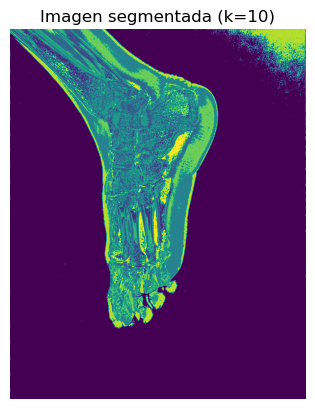

In [7]:
# Probar con K clusters 
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img = labels.reshape(img_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img, cmap='viridis')  
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

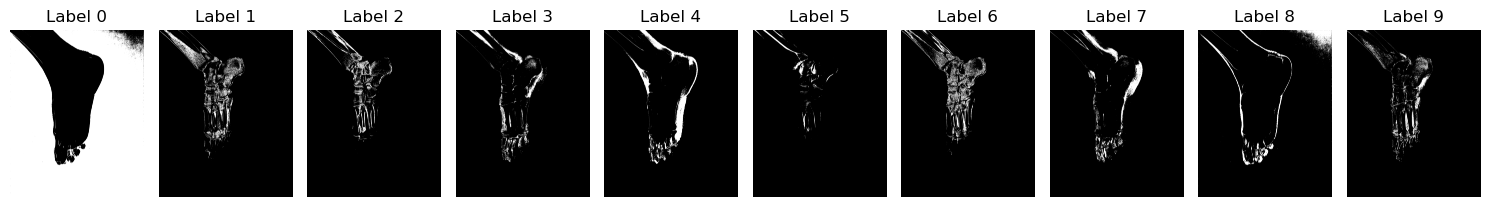

In [8]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

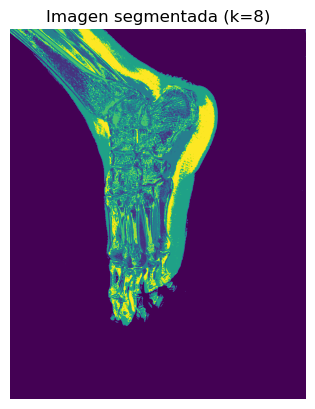

In [9]:
# Probar con K clusters 
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img = labels.reshape(img_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img, cmap='viridis')  
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

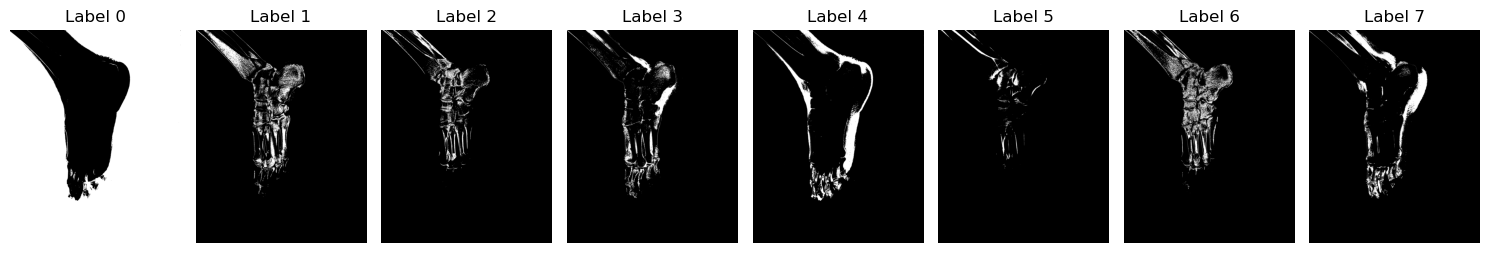

In [10]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

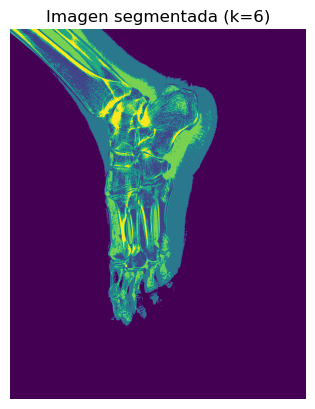

In [11]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img = labels.reshape(img_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img, cmap='viridis')  
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

Se probó la segmentación con múltiples valores de k (4, 6, 8 y 10). Los intentos iniciales con k=4 resultaron en una agrupación muy general de las intensidades, lo cual dificultaba distinguir el hueso del tejido circundante.

Con k=8, hubo una mejora relativa, comenzaron a diferenciarse partes del hueso (particularmente zonas corticales), pero aún persistía la mezcla con otras estructuras. Sin embargo, fue con k=6 donde se alcanzó un resultado más satisfactorio. Este valor permitió aislar las zonas hiperdensas (claras) con mayor precisión.

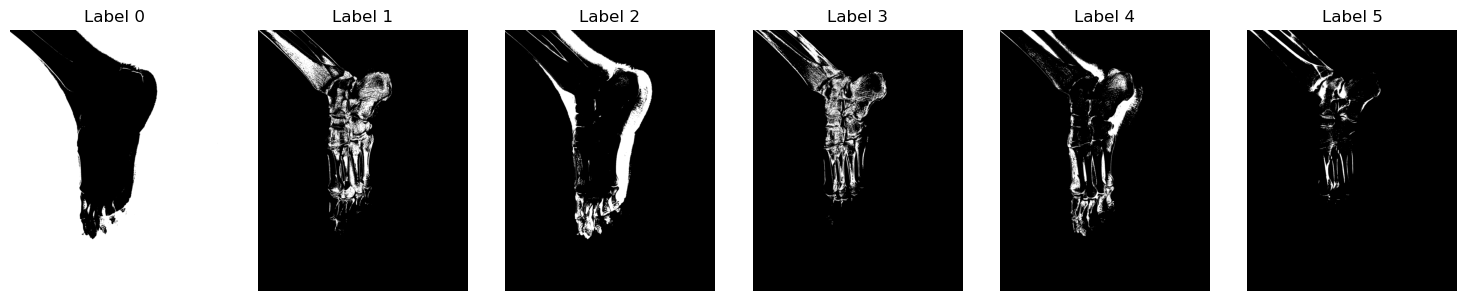

In [12]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

La selección de etiquetas correspondientes a las regiones óseas se realizó mediante un proceso visual y comparativo. Se graficaron individualmente las máscaras binarias asociadas a cada una de las etiquetas generadas por el algoritmo K-Means. Estas gráficas permitieron observar con claridad qué regiones de la imagen correspondían a cada clúster, facilitando la identificación de aquellas etiquetas que agrupaban zonas hiperdensas, es decir, áreas con alta intensidad de gris típicas del tejido óseo. Este procedimiento, basado en la inspección visual etiqueta por etiqueta, fue fundamental para construir máscaras precisas que incluyeran el hueso y excluyeran estructuras irrelevantes como tejidos blandos o el fondo.

<h2>(Este método de selección por medio de observación será usado para todas las imágenes)</h2>

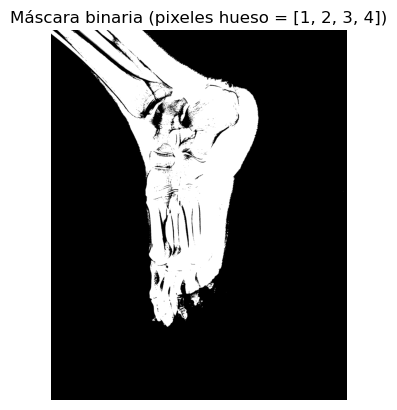

In [13]:
# Probar diferentes combinaciones de etiquetas (ensayo y error)
bone_labels = [1,2,3,4]

# Crear la máscara binaria
mask = np.isin(segmented_img, bone_labels).astype(int)

# Visualizar la máscara
plt.imshow(mask, cmap='gray')
plt.title(f"Máscara binaria (pixeles hueso = {bone_labels})")
plt.axis('off')
plt.show()


Se visualizaron las etiquetas generadas y se identificaron las etiquetas [1,2,3,4] como aquellas que mejor representaban regiones óseas. Estas etiquetas fueron seleccionadas observando que contenían regiones brillantes de alta densidad, típicas del hueso. 

Se crea una máscara binaria para aislar las etiquetas seleccionadas y se multiplica por la imagen original.

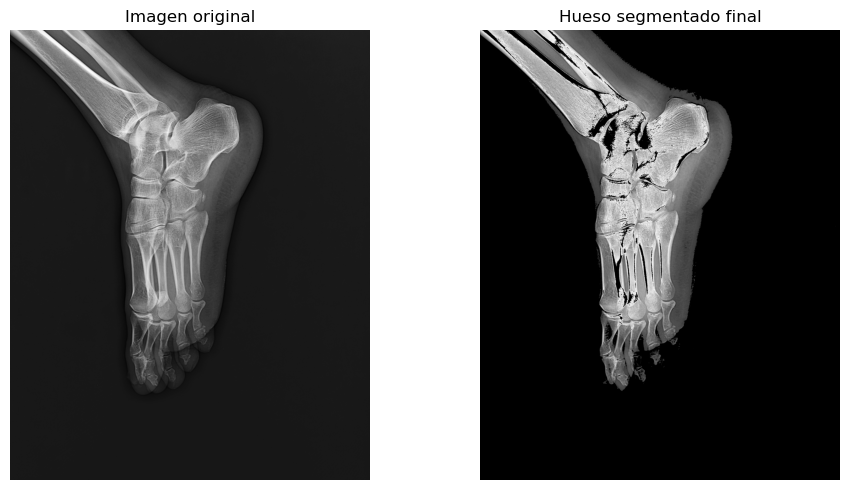

In [14]:
# Multiplicar para aislar el hueso (usar float para que se mantengan los valores de intensidad)
segmented_bone = img_array * mask

# Leer imagen en escala de grises
img = imread('Radiografias/IMG0000185.jpg', as_gray=True)

# Crear figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas

# Imagen original
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Imagen original")
axes[0].axis('off')

# Imagen segmentada
axes[1].imshow(segmented_bone, cmap='gray')
axes[1].set_title("Hueso segmentado final")
axes[1].axis('off')

plt.tight_layout()
plt.show()



Se aisló con claridad el hueso, conservando su forma, grosor y textura. La segmentación resultante fue limpia, anatómicamente coherente y presentó bajo nivel de ruido. Las zonas corticales e internas fueron capturadas adecuadamente gracias a la combinación de etiquetas. Se respetaron las fronteras anatómicas, y se minimizó el ruido de fondo. Incluso en áreas de transición entre hueso y tejido blando, la máscara logró preservar las estructuras relevantes sin incluir regiones irrelevantes.

<h2>IMAGEN 2</h2>

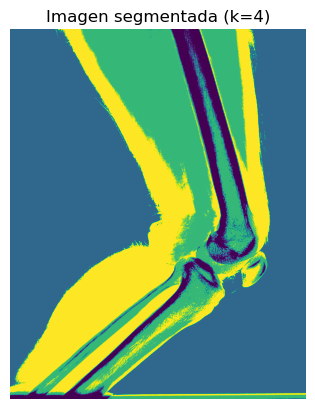

In [15]:
from sklearn.cluster import KMeans

# Reshape: de (alto, ancho) a (pixeles, 1)
X = img2_array.reshape(-1, 1)

# Probar con K clusters (prueba inicial con K=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img2 = labels.reshape(img2_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img2, cmap='viridis')  # cmap puede cambiarse para visualización
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

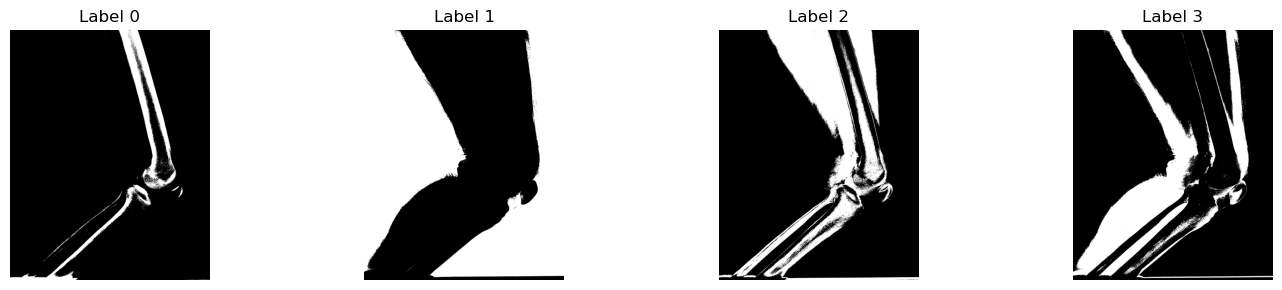

In [16]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img2 == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

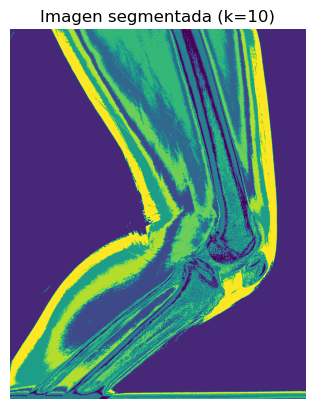

In [17]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img2 = labels.reshape(img2_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img2, cmap='viridis')  # cmap puede cambiarse para visualización
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

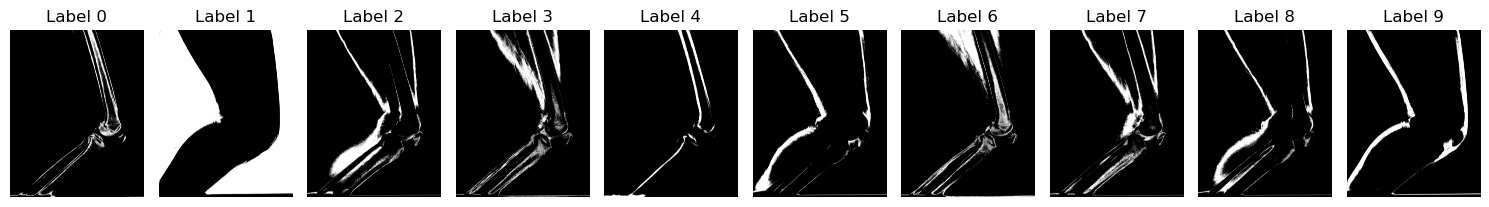

In [18]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img2 == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

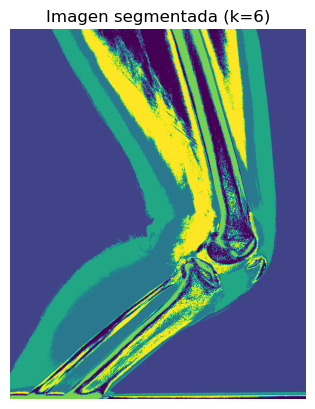

In [19]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img2 = labels.reshape(img2_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img2, cmap='viridis')  # cmap puede cambiarse para visualización
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

Se probó la segmentación con múltiples valores de k (4, 6 y 10). Los intentos iniciales con k=4 resultaron en una agrupación muy amplia de intensidades, donde el hueso quedaba parcialmente agrupado con otras regiones de tejido blando. 

Con k=10, la segmentación fue excesivamente fragmentada, dividida en pequeñas regiones dispersas, lo que complicaba la identificación debido a la presencia de ruido y estructuras oscuras del fondo.

Fue con k=6 donde se logró una segmentación más coherente y funcional. Este valor permitió separar las intensidades en grupos más definidos sin fragmentar en exceso.

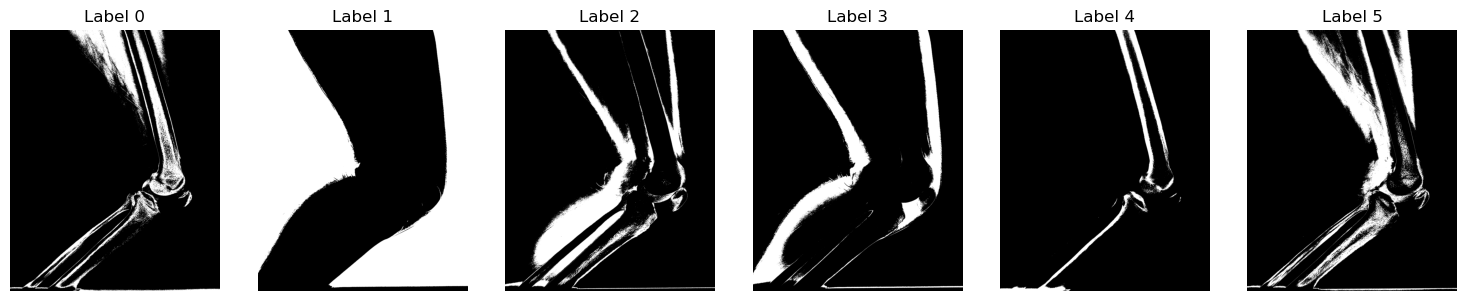

In [20]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img2 == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Las etiquetas [0,2, 3] lograron capturar zonas continuas, brillantes y densas, que correspondían al hueso. Se logró un equilibrio entre detalle anatómico y simplicidad en la selección de dichas etiquetas.

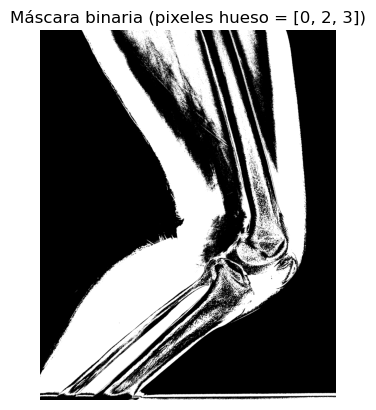

In [21]:
bone_labels2 = [0,2,3]

# Crear la máscara binaria
mask2 = np.isin(segmented_img2, bone_labels2).astype(int)

# Visualizar la máscara
plt.imshow(mask2, cmap='gray')
plt.title(f"Máscara binaria (pixeles hueso = {bone_labels2})")
plt.axis('off')
plt.show()

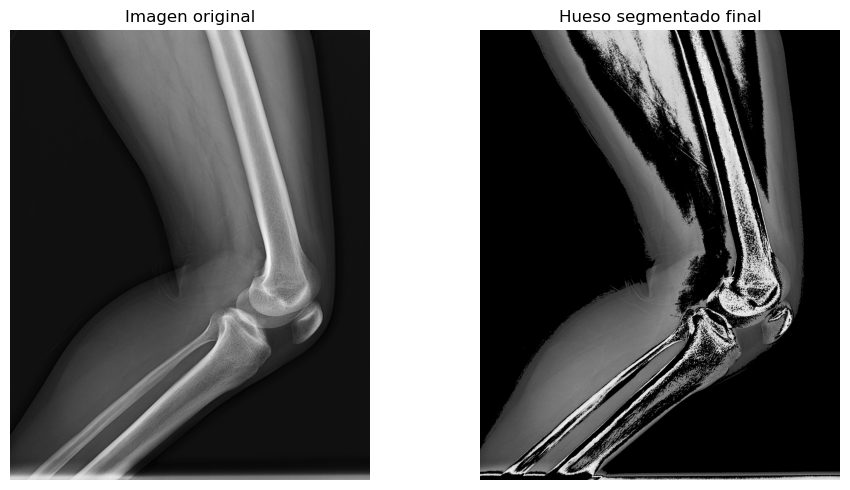

In [22]:
# Multiplicar para aislar el hueso (usar float para que se mantengan los valores de intensidad)
segmented_bone2 = img2_array * mask2

# Leer imagen en escala de grises
img2 = imread('Radiografias/IMG0000245.jpg', as_gray=True)

# Crear figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas

# Imagen original
axes[0].imshow(img2, cmap='gray')
axes[0].set_title("Imagen original")
axes[0].axis('off')

# Imagen segmentada
axes[1].imshow(segmented_bone2, cmap='gray')
axes[1].set_title("Hueso segmentado final")
axes[1].axis('off')

plt.tight_layout()
plt.show()


En la segmentación final, se logró una buena conservación del contorno óseo. Se preservó la curvatura, el grosor y la posición esperada del hueso en la imagen. Se obtuvo una delimitación clara del hueso, especialmente en su parte central. Algunas regiones periféricas del hueso más delgadas o con menor intensidad quedaron parcialmente fuera de la máscara, pero el resultado fue anatómicamente coherente. La máscara excluyó con éxito la mayoría del tejido blando y del fondo.

<h2>IMAGEN 3</h2>

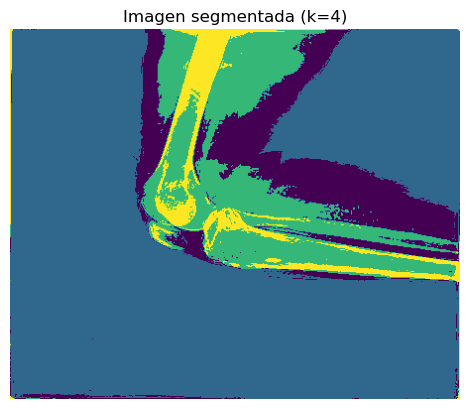

In [23]:
from sklearn.cluster import KMeans

# Reshape: de (alto, ancho) a (pixeles, 1)
X = img3_array.reshape(-1, 1)

# Probar con K clusters (prueba inicial con K=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img3 = labels.reshape(img3_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img3, cmap='viridis')  # cmap puede cambiarse para visualización
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

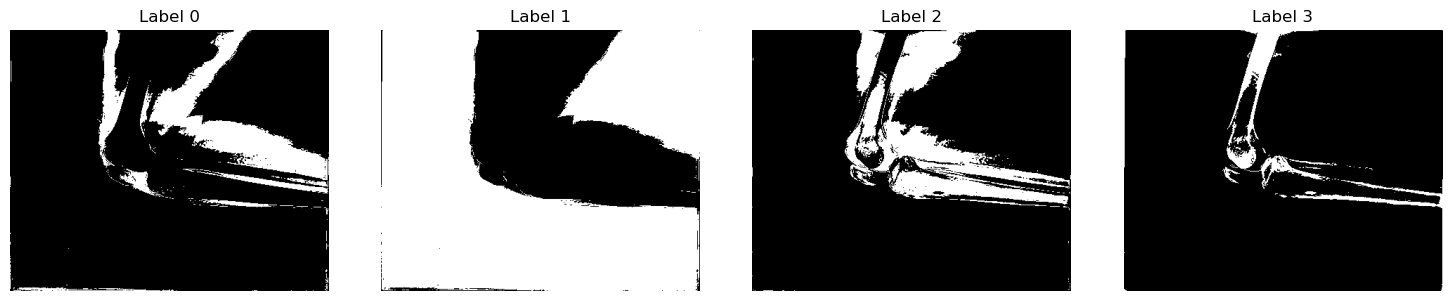

In [24]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img3 == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

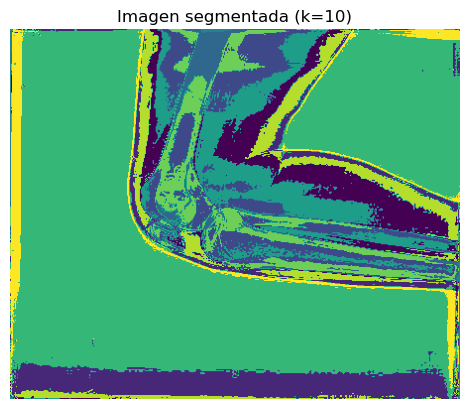

In [25]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img3 = labels.reshape(img3_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img3, cmap='viridis')  # cmap puede cambiarse para visualización
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

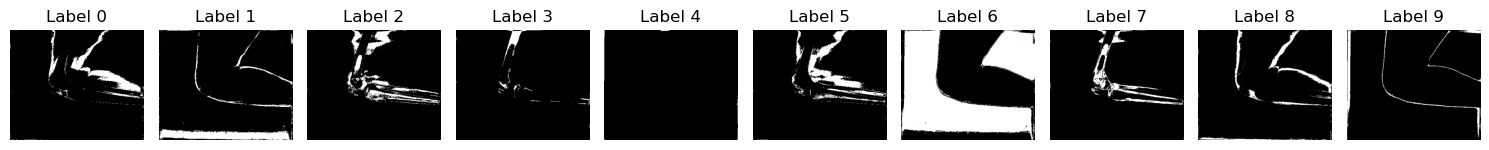

In [26]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img3 == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

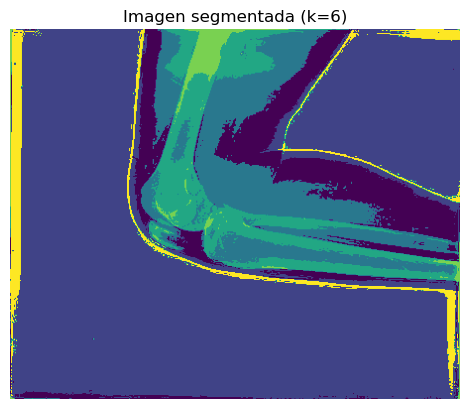

In [27]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img3 = labels.reshape(img3_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img3, cmap='viridis')  # cmap puede cambiarse para visualización
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

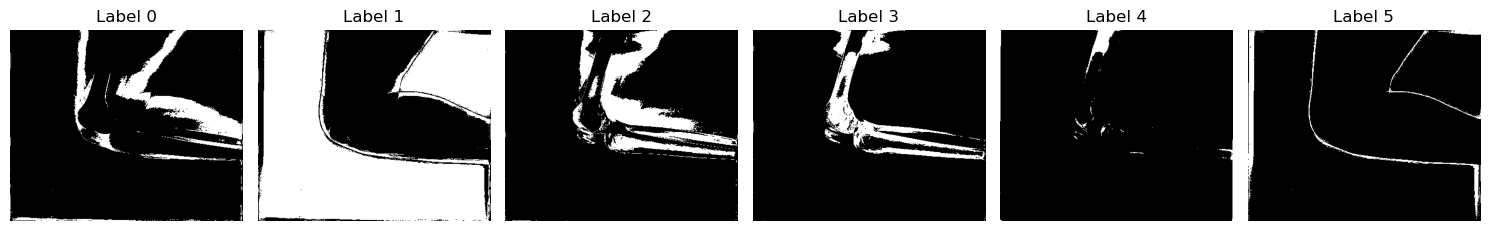

In [28]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img3 == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

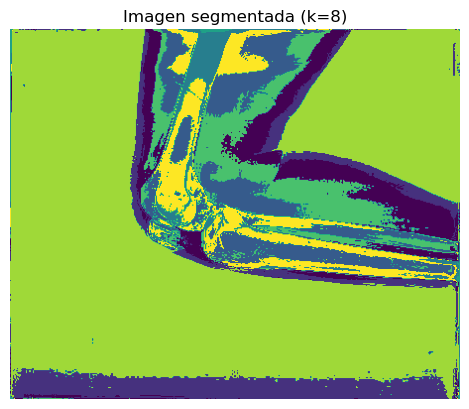

In [29]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img3 = labels.reshape(img3_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img3, cmap='viridis')  # cmap puede cambiarse para visualización
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

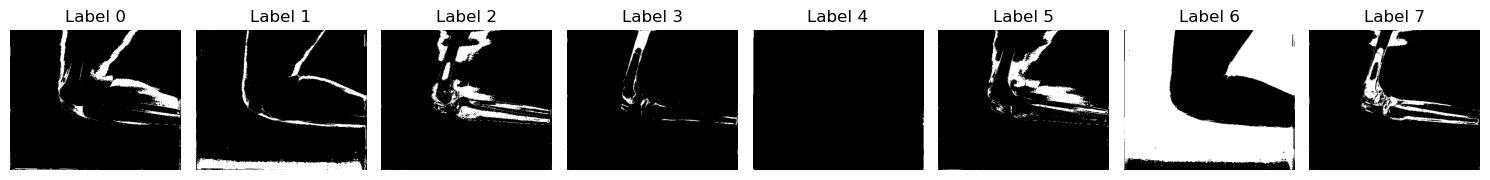

In [30]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img3 == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

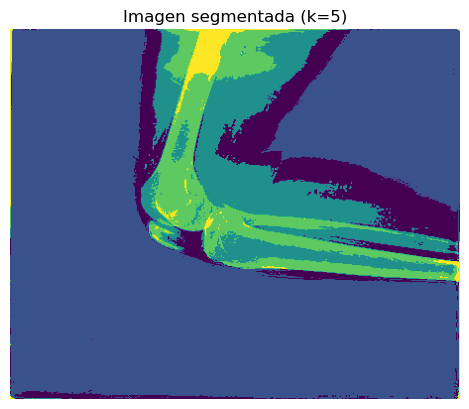

In [31]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Rearmar la imagen segmentada
segmented_img3 = labels.reshape(img3_array.shape)

# Visualizar imagen segmentada
plt.imshow(segmented_img3, cmap='viridis')  # cmap puede cambiarse para visualización
plt.title(f"Imagen segmentada (k={k})")
plt.axis('off')
plt.show()

Se probó la segmentación de la imagen con varios valores de k (4, 5, 6, 8 y 10) para evaluar cómo se agrupaban las intensidades presentes en los distintos tejidos.

Con k=4, la segmentación fue muy general. Las intensidades se agruparon de forma amplia, y las estructuras óseas quedaron fusionadas con regiones del fondo o de tejidos blandos. Esta falta de precisión impidió aislar adecuadamente el hueso, ya que no se diferenciaban bien las zonas de alta densidad.

Con k=6, se logró una segmentación más detallada. Sin embargo, se redujo la coherencia espacial del hueso en la imagen segmentada. Aunque hubo una mejor separación de fondo y tejido blando, se perdía unidad en la representación del hueso.

Para k=8, la segmentación se volvió excesivamente fragmentada. Las diferencias sutiles dentro del hueso o del fondo generaron dificultades para mantener una forma anatómicamente coherente. Las estructuras relevantes quedaban divididas en múltiples segmentos pequeños.

Con k=10, se alcanzó el mayor nivel de fragmentación. El algoritmo separó finamente las intensidades, pero a costa de la utilidad visual. Las regiones que pertenecían al hueso aparecían distribuidas de forma discontinua, lo que complicaba notablemente su reconstrucción

Al aumentar a k=5, se observó una mejora en la diferenciación de regiones. Las agrupaciones comenzaban a separarse mejor por niveles de intensidad, lo que permitió que las regiones más brillantes destacaran de forma más clara en la segmentación. Aunque aún existía cierta mezcla, la representación del hueso era más continua y localizada.

k=5 ofreció el mejor balance entre separación de tejidos y continuidad estructural. Valores menores como k=4 agruparon demasiadas intensidades juntas, y valores mayores como k=8 o k=10 fragmentaron en exceso la imagen, reduciendo la calidad de la segmentación.

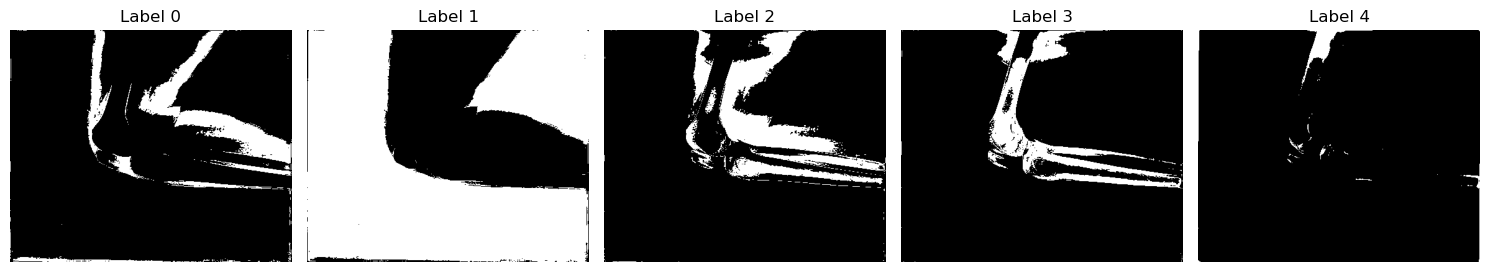

In [32]:
fig, axes = plt.subplots(1, k, figsize=(15, 3))  # 1 fila, k columnas
for i in range(k):
    mask = (segmented_img3 == i).astype(int)
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Label {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Las etiquetas [1, 2, 4] fueron seleccionadas tras análisis visual de las máscaras individuales. Estas etiquetas agrupaban las zonas más brillantes de la imagen, correspondientes al hueso. Se descartaron etiquetas que incluían zonas oscuras, que no eran de interés para la segmentación.

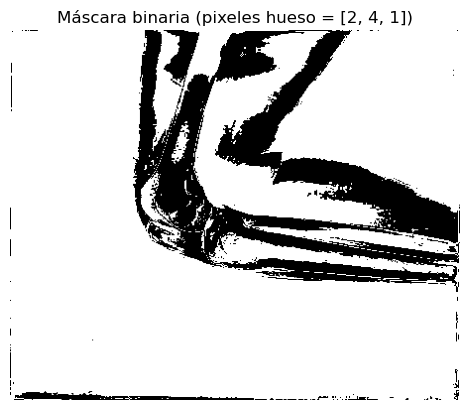

In [33]:
bone_labels3 = [2,4,1]

# Crear la máscara binaria
mask3 = np.isin(segmented_img3, bone_labels3).astype(int)

# Visualizar la máscara
plt.imshow(mask3, cmap='gray')
plt.title(f"Máscara binaria (pixeles hueso = {bone_labels3})")
plt.axis('off')
plt.show()

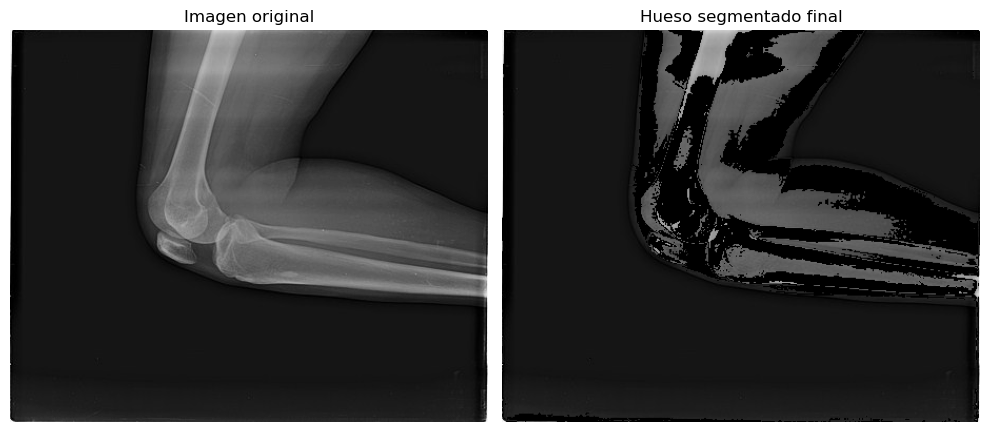

In [34]:
# Multiplicar para aislar el hueso (usar float para que se mantengan los valores de intensidad)
segmented_bone3 = img3_array * mask3

# Leer imagen en escala de grises
img3 = imread('Radiografias/IMG0003784.jpg', as_gray=True)

# Crear figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas

# Imagen original
axes[0].imshow(img3, cmap='gray')
axes[0].set_title("Imagen original")
axes[0].axis('off')

# Imagen segmentada
axes[1].imshow(segmented_bone3, cmap='gray')
axes[1].set_title("Hueso segmentado final")
axes[1].axis('off')

plt.tight_layout()
plt.show()

Al aplicar la máscara binaria correspondiente, se obtuvo una segmentación que preservó adecuadamente la forma general del hueso, incluyendo sus extremos y eje longitudinal. Sin embargo, debido a la variación en el grosor y la intensidad de la imagen, algunas zonas más delgadas no se capturaron por completo, mientras que pequeñas áreas no óseas fueron parcialmente incluidas, aunque en una proporción mínima.
La segmentación final logró aislar con razonable precisión la estructura principal del hueso, manteniendo tanto su contorno general como su localización anatómica. Si bien se presentaron algunas omisiones en regiones periféricas y leves inclusiones erróneas, el resultado fue funcional y visualmente coherente.